# Analiza wrażliwości

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from itertools import product

from simulation import run_simulation

%matplotlib inline
sns.set(style="whitegrid")

In [79]:
n_simulations = 200
plot_saving_mode = False

## Scenariusz bazowy

In [3]:
results_normal, _ = run_simulation(n_simulations=n_simulations)

In [4]:
print("średni dochód: " + str(results_normal.mean()))
print("odchylenie z dochodu: " + str(results_normal.std()))

średni dochód: 183.469359168
odchylenie z dochodu: 92.4554548474


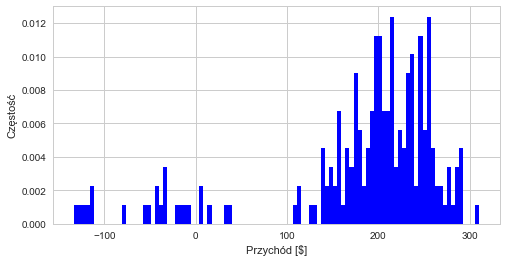

In [80]:
plt.figure(figsize = (8, 4))
plt.hist(results_normal, bins=100, density = True, color = 'blue')
plt.ylabel("Częstość")
plt.xlabel("Przychód [$]")
if plot_saving_mode:
    plt.savefig('histogram.pdf')
else:
    plt.show()

## Ile barmanów zatrudnić

Opakowalem w funkcje i dodalem macierz rozwiazan optymalnych.
Jako params mozna podac slownik postaci argument: wartosc do przekazania do run_simulation. W ten sposob mozna analizowac rozwiazanie optymalne dla alternatywnych scenariuszy.
Porownalem z poprzednim kodem - nie powinno byc rozbieznosci w wynikach

In [92]:
def find_opt_solution(max_male, max_female, params = {'n_simulations': 200}):
    bartender_results = np.zeros((max_male+1, max_female+1))
    
    for i in tqdm.tqdm( product( np.arange(max_male+1), np.arange(max_female+1) ) ):
            # creating unique combination of male and female bartenders
            params['bartenders'] = [False] * i[0] + [True] * i[1]
            #running simulation
            results, _ = run_simulation(**params)
            #appending results
            bartender_results[i] = results.mean()
            
    path_matrix = np.zeros((max_male + 1, max_female + 1))
    optimum = 0
    diags = [bartender_results[::-1,:].diagonal(i) for i in range(1-bartender_results.shape[0], bartender_results.shape[1])]
    
    for i, x in enumerate(diags):
        i0 = min(i, path_matrix.shape[0]-1) - x.argmax()
        i1 = i-i0
        path_matrix[i0, i1] = x.max() - optimum
        optimum = x.max()
    return bartender_results, path_matrix

In [93]:
bartender_results, path_matrix = find_opt_solution(10, 10, {'n_simulations': n_simulations})

121it [04:12,  2.54s/it]


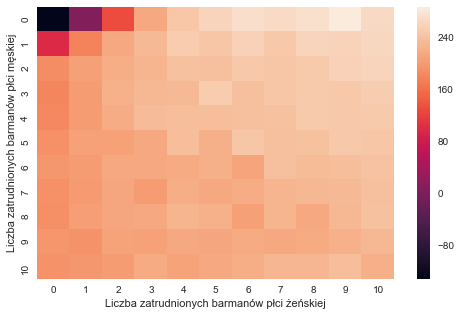

In [94]:
plt.figure(figsize = (8, 5))
sns.heatmap(bartender_results)
plt.ylabel("Liczba zatrudnionych barmanów płci męskiej")
plt.xlabel("Liczba zatrudnionych barmanów płci żeńskiej")
if plot_saving_mode:
    plt.savefig('barmani.pdf')
else:
    plt.show()

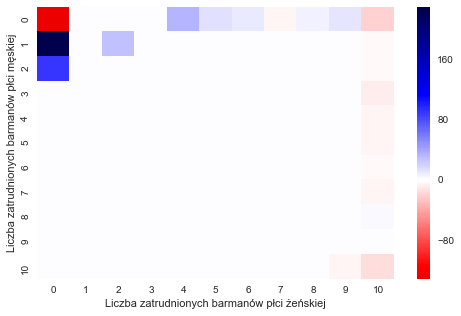

In [95]:
plt.figure(figsize = (8,5))
sns.heatmap(path_matrix, cmap = 'seismic_r', center = 0)
plt.ylabel("Liczba zatrudnionych barmanów płci męskiej")
plt.xlabel("Liczba zatrudnionych barmanów płci żeńskiej")
if plot_saving_mode:
    plt.savefig('opt_sciezka.pdf')
else:
    plt.show()

Powyższa mapka pokazuje, która kombinacja jest optymalna przy założeniu, że zatrudniamy n barmanów (optymalne rozwiązania przy założeniu równych płac). Niebieski pokazuje wzrost średniego zysku względem n-1 barmanów, czerwony to spadek. Bialy oznacza 0, czyli kombinacje nieoptymalne (na przyklad (0,1), bo lepiej jako pierwszego barmana zatrudnic faceta niz kobiete.

# Strzelaniny

Na chwilę obecną rośnie tylko prawdopodobieństwo strzelaniny przy pokerze. To w kolejce pozostaje niezmienione. Można nim manipulować poprzez argumenty p_min_queue_shootout oraz p_queue_shootout - od pewnego momentu rosnie ono liniowo.

In [14]:
results_faster_shootout, _ = run_simulation(n_simulations=n_simulations, p_lost_everything=0.05)
results_normal_shootout, _ = run_simulation(n_simulations=n_simulations)
results_slower_shootout, _ = run_simulation(n_simulations=n_simulations, p_lost_everything=0.01)

In [15]:
print("średnia:")
print("szybciej strzelaniny: " + str(results_faster_shootout.mean()))
print("normalne strzelaniny: " + str(results_normal_shootout.mean()))
print("wolniejsze strzelaniny: " + str(results_slower_shootout.mean()))

średnia:
szybciej strzelaniny: 165.843430447
normalne strzelaniny: 180.439796059
wolniejsze strzelaniny: 169.419216732


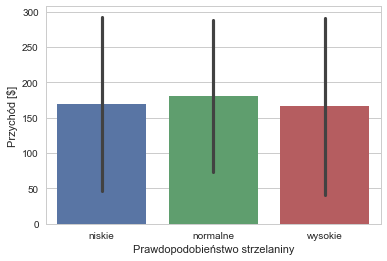

In [16]:
plt.figure(figsize=(8,4))
f, axes = plt.subplots(1, 1)
df_to_plot = pd.DataFrame(
    {
        "Prawdopodobieństwo strzelaniny": 
            ["niskie"] * n_simulations + 
            ["normalne"] * n_simulations + 
            ["wysokie"] * n_simulations,
        "Przychód [$]": np.concatenate((results_slower_shootout, results_normal_shootout, results_faster_shootout), axis=0)
    }
)
ax = sns.barplot(x="Prawdopodobieństwo strzelaniny", y="Przychód [$]", data=df_to_plot, ci="sd")
if plot_saving_mode:
    plt.savefig('p_strzelaniny.pdf')
else:
    plt.show()

In [17]:
df = pd.DataFrame.from_dict(bartender_results).T

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,-111.674662,95.449493,182.012710,190.206789,178.128021,197.086747,189.599380,192.194132,192.624509,187.526046,189.686217
1,-9.196992,186.210376,204.623282,208.842085,201.337800,198.670965,200.786804,194.679544,191.512909,193.544845,203.503306
2,132.199462,218.378630,223.244070,213.914061,212.936057,217.431949,211.829372,222.126706,208.826369,204.704008,200.975738
3,200.296657,236.512147,232.510700,231.915994,225.474929,210.876827,204.405132,214.208082,205.333895,219.300305,215.960090
4,249.687890,242.784878,231.544627,227.388585,232.910279,229.714410,227.952802,225.118087,216.760130,216.639939,215.494913
5,262.256737,258.070247,245.453975,246.372612,234.987028,228.912514,221.916350,218.436895,219.754184,228.435941,218.521595
6,260.475351,250.351683,252.809100,243.965889,245.444209,227.024320,228.735012,238.887583,228.085164,225.419183,217.107832
7,258.644861,253.197071,241.036089,248.666255,225.977153,234.372164,224.393607,233.100283,227.513394,224.836321,218.942499
8,273.510991,251.263350,251.978750,246.908467,232.760067,242.905562,232.744451,231.710615,239.391791,224.262752,236.110576
9,282.343626,265.642216,253.856997,249.275863,248.828090,242.423299,233.225631,242.970435,232.233599,234.471082,218.320757


In [19]:
df.loc[:,0] / df.loc[:,2]

0    -0.613554
1    -0.044946
2     0.592175
3     0.861451
4     1.078358
5     1.068456
6     1.030324
7     1.073055
8     1.085453
9     1.112215
10    1.022601
dtype: float64

In [20]:
df.loc[:,0] / df.loc[:,3]

0    -0.587122
1    -0.044038
2     0.618003
3     0.863660
4     1.098067
5     1.064472
6     1.067671
7     1.040129
8     1.107742
9     1.132655
10    1.056062
dtype: float64

## Jaka strategia cenowa

In [21]:
results_expensive, _ = run_simulation(n_simulations=n_simulations, drink_price=4, patience_threshold=10)
results_cheap, _ = run_simulation(n_simulations=n_simulations)
results_super_cheap, _ = run_simulation(
    n_simulations=n_simulations,
    drink_price=1,
    patience_threshold=20,
    customer_lambda=10)

In [22]:
print("średnia:")
print("droższe drinki: " + str(results_expensive.mean()))
print("tańsze drinki: " + str(results_cheap.mean()))
print("super tanie drinki: " + str(results_super_cheap.mean()))

print("\nodchylenie:")
print("droższe drinki: " + str(results_expensive.std()))
print("tańsze drinki: " + str(results_cheap.std()))
print("super tanie drinki: " + str(results_super_cheap.std()))

średnia:
droższe drinki: 337.768147661
tańsze drinki: 180.504462562
super tanie drinki: -35.1842881843

odchylenie:
droższe drinki: 145.917111555
tańsze drinki: 91.6568933449
super tanie drinki: 131.058064256


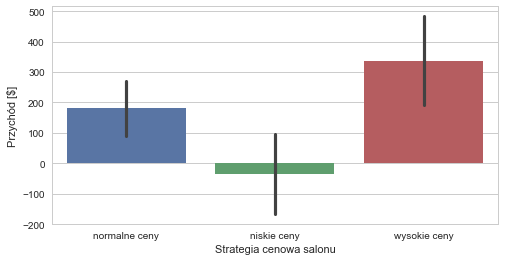

In [26]:
plt.figure(figsize=(8, 4))
df_to_plot = pd.DataFrame(
    {
        "Strategia cenowa salonu": 
            ["normalne ceny"] * n_simulations + 
            ["niskie ceny"] * n_simulations + 
            ["wysokie ceny"] * n_simulations,
        "Przychód [$]": np.concatenate((results_cheap, results_super_cheap, results_expensive), axis=0)
    }
)
ax = sns.barplot(x="Strategia cenowa salonu", y="Przychód [$]", data=df_to_plot, ci="sd")
if plot_saving_mode:
    plt.savefig('drinki.pdf')
else:
    plt.show()

## Zatrudnianie ładniejszych kelnerek

In [27]:
results_normal, _ = run_simulation(n_simulations=n_simulations)
results_beautiful, _ = run_simulation(n_simulations=n_simulations, flirt_time=25, avg_tip=5)

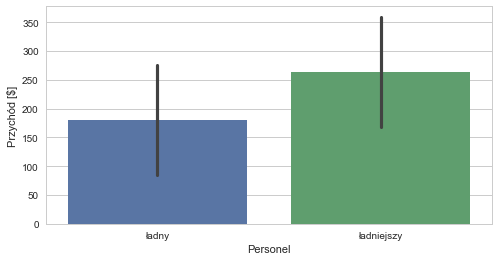

In [29]:
plt.figure(figsize=(8,4))
df_to_plot = pd.DataFrame(
    {
        "Personel": 
            ["ładny"] * n_simulations + ["ładniejszy"] * n_simulations,
        "Przychód [$]": np.concatenate((results_normal, results_beautiful), axis=0)
    }
)
ax = sns.barplot(x="Personel", y="Przychód [$]", data=df_to_plot, ci="sd")
if plot_saving_mode:
    plt.savefig('personel.pdf')
else:
    plt.show()

In [30]:
print("średni przychód ładna: " + str(results_normal.mean()))
print("średni przychód ładniejsza: " + str(results_beautiful.mean()))

print("odchylenie ładna: " + str(results_normal.std()))
print("odchylenie ładniejsza: " + str(results_beautiful.std()))

średni przychód ładna: 179.991163619
średni przychód ładniejsza: 263.522488225
odchylenie ładna: 95.1226688719
odchylenie ładniejsza: 96.1833674729


Przykład: rozwiazanie optymalne przy ladniejszych kelnerkach:

In [97]:
bartender_results, path_matrix = find_opt_solution(10, 10, {'n_simulations': n_simulations,
                                                           'flirt_time':25, 'avg_tip':5})

121it [02:47,  1.44s/it]


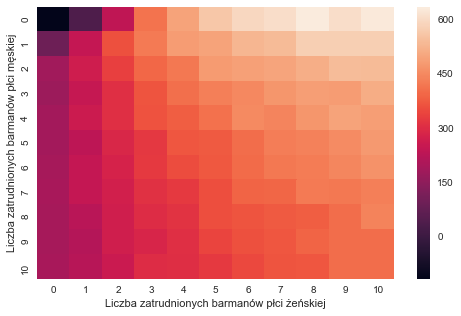

In [98]:
plt.figure(figsize = (8, 5))
sns.heatmap(bartender_results)
plt.ylabel("Liczba zatrudnionych barmanów płci męskiej")
plt.xlabel("Liczba zatrudnionych barmanów płci żeńskiej")
if plot_saving_mode:
    plt.savefig('barmani.pdf')
else:
    plt.show()

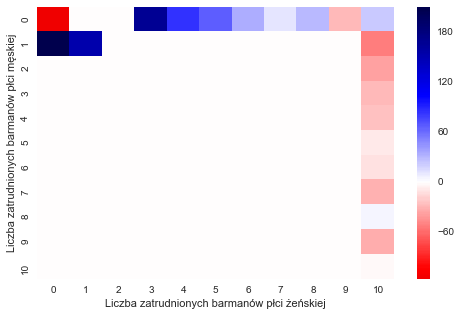

In [99]:
plt.figure(figsize = (8,5))
sns.heatmap(path_matrix, cmap = 'seismic_r', center = 0)
plt.ylabel("Liczba zatrudnionych barmanów płci męskiej")
plt.xlabel("Liczba zatrudnionych barmanów płci żeńskiej")
if plot_saving_mode:
    plt.savefig('opt_sciezka.pdf')
else:
    plt.show()

Widac, ze w przypadku ladniejszych kelnerek szybciej i bardziej ewidentnie oplaca sie zaczac je zatrudniac

## Zajęcie w kolejce

In [38]:
patience_results = np.zeros(11)
patience_std = np.zeros(11)

for patience in tqdm.tqdm(range(len(patience_results))):
    results, _ = run_simulation(n_simulations=int(n_simulations), patience_threshold=patience)
    patience_results[patience] = results.mean()
    patience_std[patience] = results.std()

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:26<00:00,  3.26s/it]


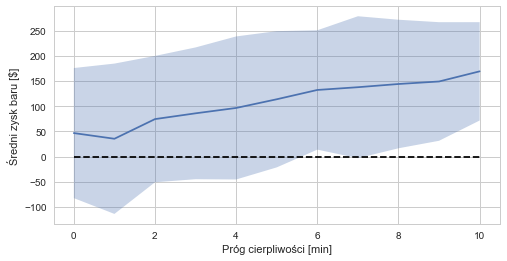

In [53]:
plt.figure(figsize = (8,4))
plt.fill_between(np.arange(0, 11), y1 = patience_results - patience_std,
                 y2 = patience_results + patience_std,
                alpha = 0.3)
plt.plot(patience_results)
plt.hlines(y = 0, xmin = 0, xmax = 10, linestyle = 'dashed')
plt.xlabel('Próg cierpliwości [min]')
plt.ylabel('Średni zysk baru [$]')
if plot_saving_mode:
    plt.savefig('zajecie_w_kolejce.pdf')
else:
    plt.show()

## Lepszy wystrój, więcej klientów, wyższa strata

In [64]:
decor_results = np.zeros(20)
decor_ccount = np.zeros(20) # customer count for illustration purposes

for decor in tqdm.tqdm(range(1, len(decor_results))):
    results, histories = run_simulation(
        n_simulations=int(n_simulations/10), 
        shootout_loss=20*decor, 
        customer_lambda=(45 - 2*decor)) # decor must have a negative parameter here to increase customer count
    decor_results[decor] = results.mean()
    decor_ccount[decor] = np.mean([[x[1:3] for x in history].count(('Customer_choice', 'new')) for history in histories])

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:04<00:00,  2.73it/s]


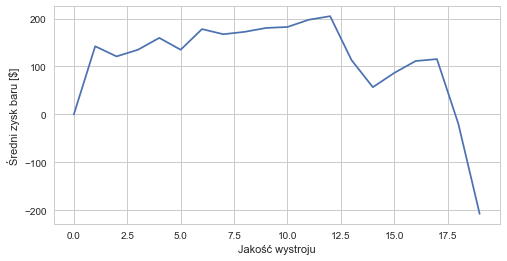

In [68]:
plt.figure(figsize = (8,4))
plt.plot(decor_results)
plt.xlabel('Jakość wystroju')
plt.ylabel('Średni zysk baru [$]')
if plot_saving_mode:
    plt.savefig('wystroj.pdf')
else:
    plt.show()

# Większe stoły do pokera

In [69]:
results_normal, _ = run_simulation(n_simulations=n_simulations)
results_1, _ = run_simulation(n_simulations=n_simulations, poker_table_size=6, poker_length=15)
results_2, _ = run_simulation(n_simulations=n_simulations, poker_table_size=7, poker_length=20)
results_3, _ = run_simulation(n_simulations=n_simulations, poker_table_size=8, poker_length=25)

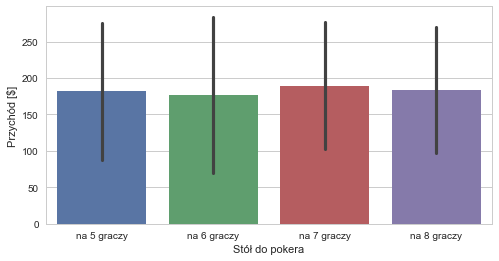

In [70]:
plt.figure(figsize=(8,4))
df_to_plot = pd.DataFrame(
    {
        "Stół do pokera": 
            ["na 5 graczy"] * n_simulations + ["na 6 graczy"] * n_simulations + ["na 7 graczy"] * n_simulations + ["na 8 graczy"] * n_simulations,
        "Przychód [$]": np.concatenate((results_normal, results_1, results_2, results_3), axis=0)
    }
)
sns.barplot(x="Stół do pokera", y="Przychód [$]", data=df_to_plot, ci="sd")
if plot_saving_mode:
    plt.savefig('poker.pdf')
else:
    plt.show()

In [71]:
print("średni przychód normal: " + str(results_normal.mean()))
print("średni przychód 1: " + str(results_1.mean()))
print("średni przychód 2: " + str(results_2.mean()))
print("średni przychód 3: " + str(results_3.mean()))

print("odchylenie normal: " + str(results_normal.std()))
print("odchylenie przychód 1: " + str(results_1.std()))
print("odchylenie przychód 2: " + str(results_2.std()))
print("odchylenie przychód 3: " + str(results_3.std()))

średni przychód normal: 181.763503319
średni przychód 1: 176.652592694
średni przychód 2: 189.262298673
średni przychód 3: 183.838075005
odchylenie normal: 94.005924194
odchylenie przychód 1: 107.44629695
odchylenie przychód 2: 87.328204038
odchylenie przychód 3: 86.5660094712
